<a href="https://colab.research.google.com/github/tibaes/mnist/blob/master/AIDojo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparação

In [0]:
!pip install --upgrade pip
!pip install tensorflow==2.0.0

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.0.0'

# Explorando MNIST

In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
def show_number(index=0):
    plt.imshow(x_train[index], cmap='gray')
    plt.title('LABEL: ' + str(y_train[index]))
    plt.show()

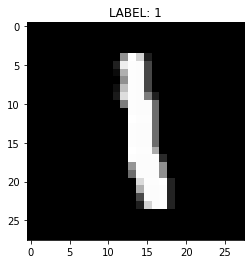

In [27]:
show_number(6)

# MultiLayer Perceptron

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [0]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [9]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2550 - accuracy: 0.9289
Epoch 2/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1146 - accuracy: 0.9658
Epoch 3/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0789 - accuracy: 0.9765
Epoch 4/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0603 - accuracy: 0.9815
Epoch 5/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0448 - accuracy: 0.9857


In [10]:
model.evaluate(x_test, y_test, verbose=2)

10000/1 - 0s - loss: 0.0381 - accuracy: 0.9770


[0.0754308887485182, 0.977]

In [13]:
model.predict(x_test)

array([[ -4.093006  ,  -9.435723  ,   1.7818097 , ...,  11.152223  ,
         -1.4895074 ,  -1.7571721 ],
       [ -8.118649  ,   5.37008   ,  12.189348  , ..., -16.8873    ,
          0.61923903, -19.035694  ],
       [ -5.56914   ,   4.606239  ,  -2.2491834 , ...,  -3.282343  ,
         -1.5610151 ,  -6.6709127 ],
       ...,
       [-11.805668  , -10.544835  , -10.032448  , ...,  -2.782434  ,
         -0.42293108,   0.6867801 ],
       [ -3.6910038 , -10.140229  , -10.868074  , ..., -10.548413  ,
          4.028998  , -12.001316  ],
       [ -2.2610574 , -14.282231  ,  -2.5718997 , ..., -11.641529  ,
         -7.267847  ,  -9.860098  ]], dtype=float32)

In [0]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [17]:
probability_model(x_test)

<tf.Tensor: id=30291, shape=(10000, 10), dtype=float32, numpy=
array([[2.39339414e-07, 1.14472409e-09, 8.51949662e-05, ...,
        9.99845624e-01, 3.23369636e-06, 2.47430626e-06],
       [1.51309953e-09, 1.09130470e-03, 9.98889863e-01, ...,
        2.35336625e-13, 9.43371015e-06, 2.74571117e-14],
       [3.79506964e-05, 9.96163487e-01, 1.04968424e-03, ...,
        3.73562536e-04, 2.08894047e-03, 1.26102959e-05],
       ...,
       [7.84658363e-12, 2.76854806e-11, 4.62148063e-11, ...,
        6.50760370e-08, 6.88875161e-07, 2.08969163e-06],
       [1.13466996e-07, 1.79475906e-10, 8.66778663e-11, ...,
        1.19325716e-10, 2.55637366e-04, 2.79091108e-11],
       [8.09429039e-08, 4.86911835e-13, 5.93174470e-08, ...,
        6.82795530e-12, 5.41698297e-10, 4.05470137e-11]], dtype=float32)>

In [21]:
model.predict(x_test[0].reshape(1, 28, 28)).argmax()

7

In [22]:
y_test[0]

7

In [24]:
x_test[0].shape

(28, 28)

In [26]:
x_test[0].reshape(1, 28, 28).shape

(1, 28, 28)